# Traffic Sign Classification 
The aim is to build a CNN model to classify 43 different classes of traffic signs using distorted images.

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
import pickle

In [3]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [4]:
train.shape

(39209, 8)

In [5]:
train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


## Save the Image Matrices in a new column

In [6]:
# We are able to save a matrix in a column only when we initialize the column with a str element - Find out why?
train["Matrix_color"] = '0'
train["Matrix_bw"] = '0'

for i in range(len(train)):
    train["Matrix_color"][i] = np.asarray(Image.open(train.Path[i]))
    train["Matrix_bw"][i] = np.asarray(Image.open(train.Path[i]).convert("L"))

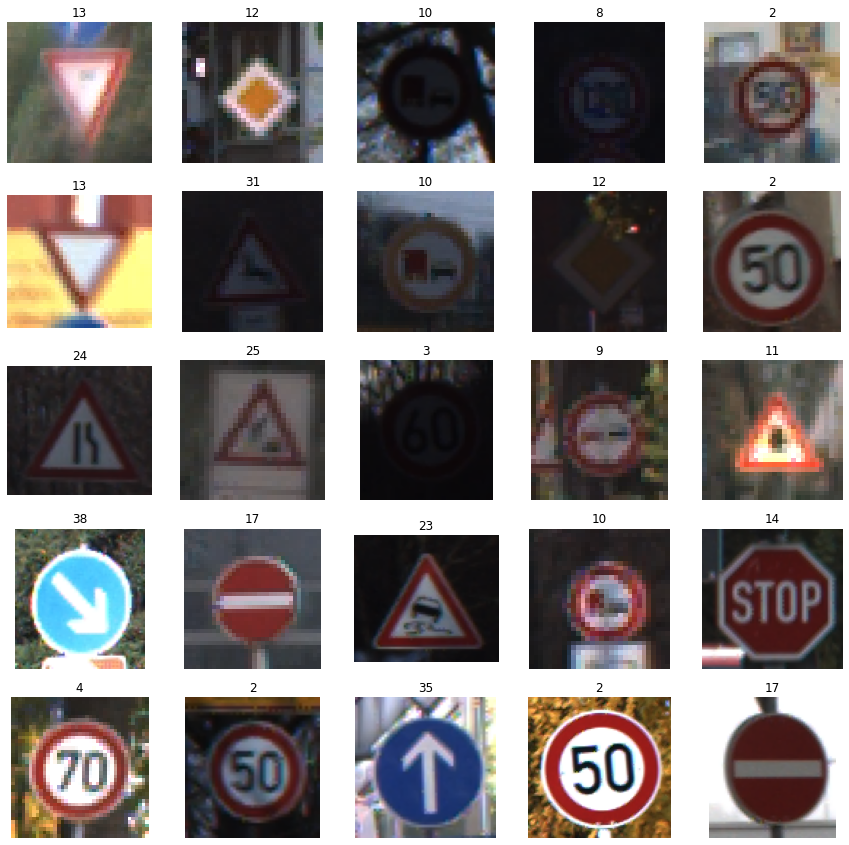

In [7]:
# Plot size
plt.figure(figsize=(15,15))

for i in range(1,26):
    plt.subplot(5,5,i)
    j = np.random.randint(0,len(train)-1)
    plt.imshow(train.Matrix_color[j])
    plt.title(train.ClassId[j], size=12)
    plt.axis("off") # turns off the axis for the image 

In [8]:
# Describe Feature(X) and Class(y) from the data
X_train = train.Matrix_bw.copy()
y_train = train.ClassId.copy()

In [9]:
# Converting the dtype from uint8 to int8
for i in range(len(X_train)):
    X_train[i].dtype = "int8"

# Normalize the Image Matrices i.e. Bringing 0-255 range to -1 to 1 range 
X_train = (X_train-128)/128

In [12]:
X_train

0        [[-0.609375, -0.6015625, -0.6015625, -0.546875...
1        [[-0.609375, -0.609375, -0.609375, -0.6015625,...
2        [[-0.6015625, -0.59375, -0.6015625, -0.6015625...
3        [[-0.609375, -0.609375, -0.609375, -0.6171875,...
4        [[-0.6015625, -0.6015625, -0.609375, -0.617187...
                               ...                        
39204    [[-0.90625, -0.9140625, -0.90625, -0.890625, -...
39205    [[-0.921875, -0.921875, -0.9296875, -0.9296875...
39206    [[-0.921875, -0.90625, -0.8984375, -0.8828125,...
39207    [[-0.890625, -0.8984375, -0.8984375, -0.890625...
39208    [[-0.921875, -0.921875, -0.9296875, -0.921875,...
Name: Matrix_bw, Length: 39209, dtype: object